In [1]:
import numpy as np
from matplotlib import pyplot as plt

import load

%matplotlib inline

ImportError: No module named 'agd_tools'

In [4]:
l = 16
color = False
orientations = load.load_orientations()
train_ids, val_ids, test_ids, train_labels, val_labels, test_labels = load.split_set(orientations)
train_data, val_data, test_data = load.load_all_data(train_ids, val_ids, test_ids, l, color)

In [49]:
def test(test_data, test_labels, l, intercept):
    N, d = test_data.shape
    assert (d == l*l)
    sum_east = np.zeros(N)
    sum_west = np.zeros(N)
    sum_north = np.zeros(N)
    sum_south = np.zeros(N)
    cut = int(l/2)
    for i in range(N):
        image = test_data[i, :].reshape((l, l))
        sum_east[i] = image[:, :cut].sum()
        sum_west[i] = image[:, cut:].sum()
        sum_north[i] = image[:cut, :].sum()
        sum_east[i] = image[cut:, :].sum()
        
    delta_east_west = intercept+np.abs(sum_east - sum_west)
    delta_north_south = np.abs(sum_north - sum_south)
    
    predicted_classes = 1+(delta_east_west<delta_north_south)

    error_rate = (test_labels!=predicted_classes).sum()/len(test_labels)
    
    return error_rate

(array([  27.,  135.,  258.,  298.,  177.,   70.,   29.,    4.,    1.,    1.]),
 array([  6141.66666667,   8371.56666667,  10601.46666667,  12831.36666667,
         15061.26666667,  17291.16666667,  19521.06666667,  21750.96666667,
         23980.86666667,  26210.76666667,  28440.66666667]),
 <a list of 10 Patch objects>)

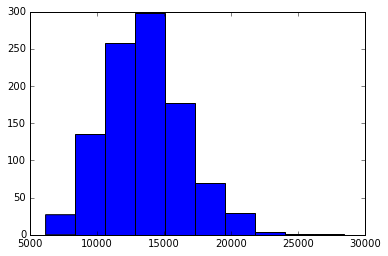

In [38]:
plt.hist(delta_north_south)

(array([ 233.,  214.,  171.,  150.,  106.,   63.,   38.,   11.,   10.,    4.]),
 array([ 15002. ,  15762.1,  16522.2,  17282.3,  18042.4,  18802.5,
         19562.6,  20322.7,  21082.8,  21842.9,  22603. ]),
 <a list of 10 Patch objects>)

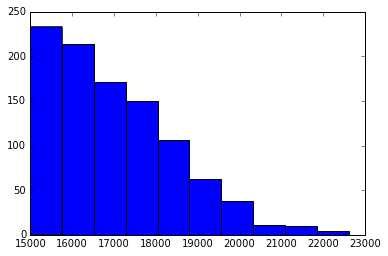

In [39]:
plt.hist(delta_east_west)

In [57]:
intercept_values = range(0, 20000, 100)
error_rates = []
for intercept in intercept_values:
    error_rates.append(test(test_data, test_labels, l, intercept))

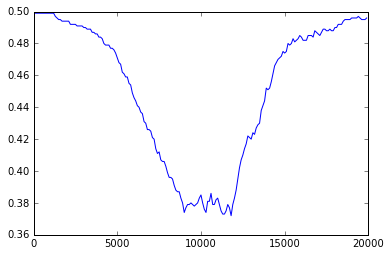

In [58]:
plt.plot(intercept_values, error_rates)